# <img style='float: left' src="http://lightning-viz.github.io/images/logo.png"> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Line plots in <a href='http://lightning-viz.github.io/'><font color='#9175f0'>Lightning</font></a>

## <hr> Setup

In [2]:
import os
from lightning import Lightning

from numpy import random, asarray, arange
from sklearn import datasets
from scipy.ndimage.filters import gaussian_filter
from seaborn import color_palette

## Connect to server


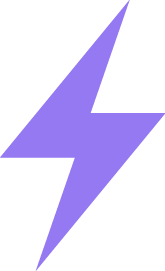

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [3]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

## <hr> One random line with default styles

To experience Lightning's custom zoom behaviors, try zooming and panning with the alt or command keys held down.
<br>
Alt will only zoom/pan in x (especially useful for time series), and command for y.

In [4]:
y = gaussian_filter(random.rand(100), 3)
lgn.line(y)

## <hr> Setting line width and color

For a single line you can pass one size and color.

In [5]:
y = gaussian_filter(random.rand(100), 3)
lgn.line(y, size=10, color=[255,100,100])

## <hr> Multiple lines

Colors for multiple lines will automatically be assigned. Try hovering over a line to highlight it!

In [6]:
y = gaussian_filter(random.rand(5,100), [0, 3])
y = (y.T + arange(0,5)*0.2).T
lgn.line(y, size=6)

You can also set colors and sizes yourself, providing one per line. Here we do so using a palette from `seaborn`.

In [7]:
y = gaussian_filter(random.rand(5,100), [0, 3])
y = (y.T + arange(0,5)*0.2).T
c = map(lambda x: list(asarray(x)*255), color_palette('Blues', 5))
s = [8, 10, 12, 14, 16]
lgn.line(y, size=s, color=c)

## <hr> Staggered lines and indices

It's possible to show multiple lines of unequal length. 
<br>
Here we also demonstrate passing an `index` to set the xaxis (we assume the `index` corresponds to the longest of the lines).

In [8]:
y1 = gaussian_filter(random.rand(50), 5).tolist()
y2 = gaussian_filter(random.rand(75), 5).tolist()
y3 = gaussian_filter(random.rand(100), 5).tolist()
x = range(50,150)
lgn.line([y1,y2,y3], size=6, index=x)

## <hr> Clustered series with group labels

Instead of specifying colors directly as rgb, you can specify group assignments.
<br>
Here we use `scikitlearn` to generate clusters and then color according to cluster label.

In [9]:
d, g = datasets.make_blobs(n_features=5, n_samples=20, centers=5, cluster_std=1.0, random_state=100)
lgn.line(d, group=g)

## <hr> Axis labels

You can also label the axes.

In [12]:
y = gaussian_filter(random.rand(100), 3)
lgn.line(y, size=10, xaxis='variable #1', yaxis='variable #2')